In [2]:
import requests
import json
import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString

In [3]:
with open('../data/WeGo.json') as fi:
    credentials = json.load(fi)

In [4]:
Authorization = credentials['Authorization']

In [ ]:
#['geometry'],['fromStopName'],['toStopName'],['averageTravelSeconds'],['averageTravelSpeed'],['percent90Secs'],['medianSecs']

#### AM peak 6-9am/ Off peak 9am-2:30pm/ PM peak 2:30pm-6pm
##### Identify intersections and other locations which experience frequent delays.
##### Compare the AM and PM rush on Monday through Friday
Most likely way to find bottlenecks would be to use inbound for morning peak and outbound for afternoon peak.

Index(['geometry', 'fromStopId', 'fromStopName', 'toStopId', 'toStopName',
       'pathLengthMeters', 'averageTravelSeconds', 'averageTravelSpeed',
       'maxSecs', 'percent90Secs', 'percent80Secs', 'percent70Secs',
       'medianSecs', 'percent30Secs', 'percent10Secs', 'minSecs', 'numTrips'],
      dtype='object')

## AM peak 6am - 9am inbound only

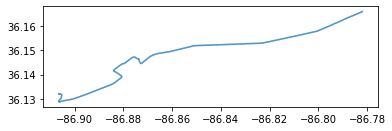

In [43]:
janfebm.plot();

#### DEF function to concat:

In [5]:
def concat_frames(geo_response, response):
    """This function pulls in two API requests, puts one in a geodataframe the other in a dataframe and concats desired columns"""
    geo_df = gpd.GeoDataFrame.from_features(geo_response.json()['features'])
    res_df = pd.DataFrame(response.json()['data']['segments'])
    full_df = pd.concat([geo_df, res_df[['countForSegment', 'percent20Secs']]], axis = 1)
    return full_df

In [98]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '01-25-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '02-24-2022',
    'endTime' : '09:00',
    'excludeDates': '01-17-2022,02-18-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '01-25-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '02-24-2022',
    'endTime' : '09:00',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [107]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

paramsh = {
    'direction': '0',
    'startDate': '01-25-2022',
    'beginTime' : '14:30',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '02-24-2022',
    'endTime' : '18:00',
    'excludeDates': '01-17-2022,02-18-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}

paramse = {
    'direction': '0',
    'startDate': '01-25-2022',
    'beginTime' : '14:30',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '02-24-2022',
    'endTime' : '18:00',
    'excludeDates': '01-17-2022,02-18-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [100]:
janfebin = concat_frames(requests.get(URL, params = params, headers = headers), requests.get(URL, params = params1, headers = headers))


In [108]:
janfebout = concat_frames(requests.get(URL, params = paramsh, headers = headers), requests.get(URL, params = paramse, headers = headers))


In [105]:
janfebin = janfebin.loc[janfebin['countForSegment'] > janfebin['countForSegment'].max()/2]
janfebin.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,24.452628,3.242119,10.356151,26.756221,5.724536,4.096427,3.224416,2.343001,1.924504,1.639572,1.146184,266.460177,1.786635
std,0.374156,3.782359,3.731397,48.652823,10.396406,7.326590,5.040287,1.982209,0.718226,0.417444,0.280360,6.303544,0.529254
min,23.427000,1.500474,0.510921,2.373000,1.755000,1.567000,1.508000,1.408000,1.315000,1.183000,0.641000,208.000000,1.259000
25%,24.270000,1.787965,7.718964,6.229000,2.151000,1.918000,1.800000,1.648000,1.512000,1.365000,1.003000,263.000000,1.443000
50%,24.486000,2.284612,10.788481,12.221000,2.993000,2.495000,2.250000,1.964000,1.750000,1.527000,1.140000,268.000000,1.645000
75%,24.691000,3.165321,13.679185,27.474000,4.753000,3.633000,3.059000,2.455000,2.092000,1.764000,1.273000,271.000000,1.968000
max,24.929000,47.925243,15.722036,731.145000,110.316000,94.527000,74.010000,38.879000,11.763000,4.336000,2.739000,274.000000,6.961000


In [109]:
janfebout = janfebout.loc[janfebout['countForSegment'] > janfebout['countForSegment'].max()/2]
janfebout.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,24.597450,4.088183,7.828138,58.048220,7.891772,4.716093,3.561141,2.524233,2.042131,1.680646,1.035869,314.764356,1.859651
std,0.314486,3.118198,3.087776,62.715539,12.017579,5.355507,3.149760,1.193200,0.591292,0.354115,0.382675,48.208603,0.435686
min,23.249000,1.704816,0.881214,3.995000,1.893000,1.727000,1.648000,1.531500,1.432000,1.272000,0.330000,285.000000,1.355000
25%,24.348000,2.385063,5.488211,22.190000,2.950000,2.407000,2.190000,1.865000,1.680000,1.466000,0.772000,303.000000,1.587000
50%,24.610000,3.125225,7.947615,42.747000,4.580000,3.416000,2.761000,2.104000,1.826000,1.572000,1.151000,305.000000,1.709000
75%,24.845000,4.456122,10.343781,69.367000,7.329000,4.942000,3.808000,2.717000,2.187000,1.765000,1.243000,308.000000,1.977000
max,24.975000,27.481415,14.533533,605.999000,126.021000,56.703000,35.717000,13.722000,5.518000,3.421000,2.159000,569.000000,3.655000


In [92]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

paramsa = {
    'direction': '1',
    'startDate': '02-25-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '03-26-2022',
    'endTime' : '09:00',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}

paramsb = {
    'direction': '1',
    'startDate': '02-25-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '03-26-2022',
    'endTime' : '09:00',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [93]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

paramss = {
    'direction': '0',
    'startDate': '02-25-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '03-26-2022',
    'endTime' : '09:00',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}

paramst = {
    'direction': '0',
    'startDate': '02-25-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '03-26-2022',
    'endTime' : '09:00',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [94]:
febmarin = concat_frames(requests.get(URL, params = paramsa, headers = headers), requests.get(URL, params = paramsb, headers = headers))


In [95]:
febmarout = concat_frames(requests.get(URL, params = paramss, headers = headers), requests.get(URL, params = paramst, headers = headers))


In [96]:
febmarin = febmarin.loc[febmarin['countForSegment'] > febmarin['countForSegment'].max()/2]
febmarin.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,24.452628,3.290639,10.171156,24.003304,5.900581,4.218327,3.246310,2.380325,1.937064,1.645067,1.196915,185.953982,1.794781
std,0.374156,3.724729,3.757340,40.033429,10.401434,7.466294,4.884106,2.138791,0.698609,0.416811,0.295800,4.214717,0.527579
min,23.427000,1.468783,0.499534,2.081000,1.709000,1.614000,1.536000,1.433500,1.327000,1.180000,0.563000,139.000000,1.269000
25%,24.270000,1.849946,7.612216,5.656000,2.295000,1.947000,1.798000,1.629000,1.517000,1.363000,1.065000,185.000000,1.449000
50%,24.486000,2.350005,10.344893,11.292000,3.235000,2.532000,2.266000,1.960000,1.759000,1.539000,1.215000,187.000000,1.657000
75%,24.691000,3.237022,13.260596,29.895000,4.833000,3.684000,3.078000,2.432000,2.109000,1.780000,1.336000,188.000000,1.957000
max,24.929000,49.017718,16.216355,669.363000,109.963000,96.403000,76.592000,41.542000,10.166000,4.265000,2.442000,190.000000,6.352000


In [97]:
febmarout = febmarout.loc[febmarout['countForSegment'] > febmarout['countForSegment'].max()/2]
febmarout.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,numTrips,countForSegment,percent20Secs
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,0.0,575.000000,575.000000
mean,24.603096,3.128307,10.377857,23.045357,5.455177,3.762120,2.943402,2.276492,1.917677,1.609946,1.189543,NaN,167.005217,1.774826
std,0.369507,2.936418,3.687007,46.463930,8.957801,5.375094,2.862809,1.327698,0.686141,0.393442,0.273057,NaN,11.084329,0.522215
min,23.249000,1.420184,0.933194,2.259000,1.790000,1.594000,1.487000,1.368000,1.255000,1.116000,0.671000,NaN,126.000000,1.203000
25%,24.422000,1.848448,7.756278,4.834000,2.309000,2.003000,1.850000,1.677500,1.537000,1.359500,1.043000,NaN,160.500000,1.474000
50%,24.726000,2.227862,11.053744,7.554000,3.097000,2.445000,2.175000,1.883000,1.714000,1.500000,1.134000,NaN,169.000000,1.620000
75%,24.932000,3.163703,13.322027,20.098000,4.781000,3.439500,2.940000,2.413500,2.037500,1.697500,1.290000,NaN,171.000000,1.869000
max,24.975000,26.581837,17.261144,460.223000,80.627000,61.503000,34.279000,16.856000,10.114000,4.450000,2.516000,NaN,218.000000,7.735000


In [86]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

paramsc = {
    'direction': '1',
    'startDate': '03-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '04-26-2022',
    'endTime' : '09:00',
    'excludedates': '04-14-2022,04-15-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}

paramsd = {
    'direction': '1',
    'startDate': '03-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '04-26-2022',
    'endTime' : '09:00',
    'excludedates': '04-14-2022,04-15-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [87]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

paramsq = {
    'direction': '0',
    'startDate': '03-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '04-26-2022',
    'endTime' : '09:00',
    'excludedates': '04-14-2022,04-15-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}

paramsr = {
    'direction': '0',
    'startDate': '03-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '04-26-2022',
    'endTime' : '09:00',
    'excludedates': '04-14-2022,04-15-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [88]:
maraprin = concat_frames(requests.get(URL, params = paramsc, headers = headers), requests.get(URL, params = paramsd, headers = headers))


In [89]:
maraprout = concat_frames(requests.get(URL, params = paramsq, headers = headers), requests.get(URL, params = paramsr, headers = headers))


In [90]:
maraprin = maraprin.loc[maraprin['countForSegment'] > maraprin['countForSegment'].max()/2]
maraprin.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,24.452628,3.346050,10.365476,27.701356,5.842327,4.155874,3.293855,2.388276,1.952235,1.661122,1.142641,258.341593,1.810435
std,0.374156,4.199454,3.984164,54.365712,10.555904,7.412226,5.238625,2.006931,0.785745,0.429597,0.286625,4.763014,0.591071
min,23.427000,1.462452,0.524962,1.996000,1.694000,1.567000,1.486000,1.387000,1.284000,1.189000,0.623000,202.000000,1.241000
25%,24.270000,1.818369,7.623227,5.982000,2.151000,1.930000,1.793000,1.632000,1.522000,1.382000,0.911000,257.000000,1.463000
50%,24.486000,2.318188,10.533484,10.948000,3.080000,2.532000,2.277000,1.959000,1.758000,1.549000,1.101000,259.000000,1.653000
75%,24.691000,3.188182,13.515268,30.962000,4.897000,3.685000,3.032000,2.441000,2.108000,1.794000,1.283000,261.000000,1.966000
max,24.929000,46.643356,16.726019,818.281000,110.356000,92.674000,74.461000,33.794000,11.029000,4.931000,2.412000,266.000000,7.839000


In [91]:
maraprout = maraprout.loc[maraprout['countForSegment'] > maraprout['countForSegment'].max()/2]
maraprout.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,24.604367,3.215862,10.378032,27.398262,5.555938,3.877433,3.026107,2.334415,1.967295,1.606960,1.085227,230.126516,1.808529
std,0.369496,3.219910,3.752730,52.057801,8.998329,5.378091,3.118716,1.624117,1.059354,0.352652,0.293883,10.877934,0.831237
min,23.249000,1.433067,0.772798,2.436000,1.726000,1.576000,1.491000,1.371000,1.282000,1.115000,0.445000,136.000000,1.224000
25%,24.496000,1.848403,7.910931,5.113000,2.267000,1.985000,1.843000,1.663000,1.549000,1.383000,0.927000,223.000000,1.475000
50%,24.726000,2.211536,11.092350,8.927000,2.972000,2.427000,2.145000,1.909000,1.729000,1.514000,1.111000,234.000000,1.638000
75%,24.932000,3.140277,13.298383,21.850000,4.705000,3.541000,3.039000,2.446000,2.058000,1.684000,1.218000,237.000000,1.889000
max,24.975000,32.311159,17.105969,441.792000,81.331000,65.711000,32.618000,22.710000,21.085000,3.428000,2.162000,244.000000,17.891000


In [77]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

paramsc = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'endTime' : '09:00',
    'format' : 'geojson',
    'resolution': 'hiRes',
}

paramsd = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'endTime' : '09:00',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [78]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

paramso = {
    'direction': '0',
    'startDate': '04-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'endTime' : '09:00',
    'format' : 'geojson',
    'resolution': 'hiRes',
}

paramsp = {
    'direction': '0',
    'startDate': '04-27-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'endTime' : '09:00',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [82]:
aprmayin = concat_frames(requests.get(URL, params = paramsc, headers = headers), requests.get(URL, params = paramsd, headers = headers))


In [83]:
aprmayout = concat_frames(requests.get(URL, params = paramso, headers = headers), requests.get(URL, params = paramsp, headers = headers))


In [84]:
aprmayin = aprmayin.loc[aprmayin['countForSegment'] > aprmayin['countForSegment'].max()/2]
aprmayin.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,24.452628,3.307029,10.606323,23.012117,6.002441,4.185998,3.345841,2.407245,1.949437,1.648173,1.193848,238.341593,1.810570
std,0.374156,4.150888,4.142526,53.584806,11.348876,7.663325,5.639293,2.283806,0.749511,0.401346,0.290854,5.201792,0.545592
min,23.427000,1.402672,0.548548,1.972000,1.609000,1.518000,1.457000,1.356500,1.280000,1.177000,0.666000,191.000000,1.244000
25%,24.270000,1.769789,7.797509,4.697000,2.101000,1.870000,1.752000,1.619500,1.520000,1.393000,1.042000,236.000000,1.469000
50%,24.486000,2.282364,10.827699,7.811000,3.023000,2.495000,2.244000,1.942000,1.758000,1.549000,1.181000,240.000000,1.666000
75%,24.691000,3.166524,13.799204,21.487000,4.820000,3.687000,3.019000,2.452000,2.114000,1.791000,1.300000,242.000000,1.966000
max,24.929000,44.637805,17.582870,908.216000,109.916000,84.551000,77.720000,34.793500,8.932000,4.182000,2.517000,242.000000,6.040000


In [85]:
aprmayout = aprmayout.loc[aprmayout['countForSegment'] > aprmayout['countForSegment'].max()/2]
aprmayout.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,24.604367,3.228906,10.303034,23.617733,5.644085,3.955239,3.107588,2.374698,2.006511,1.672374,1.241222,209.894281,1.846898
std,0.369496,3.209899,3.772549,44.932842,9.430374,5.766846,3.325042,1.742656,1.147630,0.433110,0.260158,9.925465,0.938285
min,23.249000,1.430917,0.847283,2.365000,1.772000,1.540000,1.481000,1.308500,1.176000,1.011000,0.555000,126.000000,1.082000
25%,24.496000,1.853590,7.575945,4.617000,2.260000,1.969000,1.808000,1.657000,1.549000,1.402000,1.092000,202.000000,1.488000
50%,24.726000,2.261430,10.851553,7.889000,3.064000,2.417000,2.200000,1.927000,1.764000,1.568000,1.206000,212.000000,1.669000
75%,24.932000,3.241724,13.262618,20.557000,4.725000,3.688000,3.133000,2.520000,2.130000,1.777000,1.378000,218.000000,1.953000
max,24.975000,28.525290,17.199156,414.240000,92.094000,77.674000,34.422000,23.511500,21.132000,5.196000,2.640000,224.000000,20.039000


In [65]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

paramsf = {
    'direction': '1',
    'startDate': '05-26-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '06-25-2022',
    'endTime' : '09:00',
    'excludedates': '05-30-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}

paramsg = {
    'direction': '1',
    'startDate': '05-26-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '06-25-2022',
    'endTime' : '09:00',
    'excludedates': '05-30-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [66]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

paramsm = {
    'direction': '0',
    'startDate': '05-26-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '06-25-2022',
    'endTime' : '09:00',
    'excludedates': '05-30-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}

paramsn = {
    'direction': '0',
    'startDate': '05-26-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '06-25-2022',
    'endTime' : '09:00',
    'excludedates': '05-30-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [67]:
mayjunin = concat_frames(requests.get(URL, params = paramsf, headers = headers), requests.get(URL, params = paramsg, headers = headers))


In [68]:
mayjunout = concat_frames(requests.get(URL, params = paramsm, headers = headers), requests.get(URL, params = paramsn, headers = headers))


In [69]:
mayjunin = mayjunin.loc[mayjunin['countForSegment'] > mayjunin['countForSegment'].max()/2]
mayjunin.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,24.452628,3.300226,10.639840,26.445556,5.848515,4.213329,3.357416,2.401242,1.955853,1.621446,1.137740,252.189381,1.806899
std,0.374156,4.267935,4.113751,58.835399,11.265706,7.890373,5.743160,2.206394,0.896251,0.406410,0.323587,5.276526,0.616891
min,23.427000,1.401441,0.571081,2.047000,1.643000,1.524000,1.426000,1.349000,1.281000,1.163000,0.622000,196.000000,1.226000
25%,24.270000,1.765571,7.694461,4.843000,2.120000,1.891000,1.736000,1.614000,1.500000,1.353000,0.909000,250.000000,1.435000
50%,24.486000,2.274549,10.795621,8.352000,2.958000,2.478000,2.244000,1.948000,1.754000,1.510000,1.118000,254.000000,1.653000
75%,24.691000,3.175401,13.895299,22.031000,4.602000,3.689000,3.062000,2.438000,2.121000,1.758000,1.292000,255.000000,1.979000
max,24.929000,42.876591,17.598315,811.764000,108.868000,87.297000,66.496000,34.297000,15.101000,4.257000,2.662000,258.000000,9.210000


In [70]:
mayjunout = mayjunout.loc[mayjunout['countForSegment'] > mayjunout['countForSegment'].max()/2]
mayjunout.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,24.604367,3.178354,10.320040,24.664395,5.356562,3.780140,3.051477,2.331932,1.986161,1.673744,1.207314,220.161179,1.835324
std,0.369496,3.129178,3.685638,49.033723,8.024373,4.856607,3.169919,1.669264,1.175850,0.801926,0.274466,11.049291,0.969034
min,23.249000,1.429513,0.744693,2.620000,1.677000,1.547000,1.474000,1.244000,1.160000,1.014000,0.709000,138.000000,1.077000
25%,24.496000,1.876063,7.907257,5.171000,2.304000,1.982000,1.828000,1.664500,1.551000,1.381000,1.042000,213.000000,1.478000
50%,24.726000,2.227291,10.983319,8.626000,2.984000,2.405000,2.212000,1.894000,1.735000,1.549000,1.142000,223.000000,1.659000
75%,24.932000,3.127055,13.169071,20.158000,4.820000,3.536000,3.058000,2.438000,2.105000,1.741000,1.325000,228.000000,1.943000
max,24.975000,33.530582,17.351109,494.239000,81.133000,49.486000,34.387000,23.786000,21.470000,17.836000,2.446000,237.000000,20.456000


In [71]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

paramsj = {
    'direction': '1',
    'startDate': '06-26-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '07-26-2022',
    'endTime' : '09:00',
    'excludedates': '07-04-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}

paramsk = {
    'direction': '1',
    'startDate': '06-26-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '07-26-2022',
    'endTime' : '09:00',
    'excludedates': '07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [72]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

paramsl = {
    'direction': '0',
    'startDate': '06-26-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '07-26-2022',
    'endTime' : '09:00',
    'excludedates': '07-04-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}

paramsll = {
    'direction': '0',
    'startDate': '06-26-2022',
    'beginTime' : '06:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '07-26-2022',
    'endTime' : '09:00',
    'excludedates': '07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [73]:
junjulin = concat_frames(requests.get(URL, params = paramsj, headers = headers), requests.get(URL, params = paramsk, headers = headers))


In [74]:
junjulout = concat_frames(requests.get(URL, params = paramsl, headers = headers), requests.get(URL, params = paramsll, headers = headers))


In [75]:
junjulin = junjulin.loc[junjulin['countForSegment'] > junjulin['countForSegment'].max()/2]
junjulin.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,24.452628,3.264502,10.735543,24.509308,5.764154,4.209729,3.353189,2.428403,1.943876,1.608191,1.086851,238.833628,1.776412
std,0.374156,4.317110,4.094224,56.904247,11.064482,8.116803,5.827119,2.735649,0.999758,0.402945,0.271505,4.401878,0.554970
min,23.427000,1.383465,0.515499,2.042000,1.608000,1.514000,1.450000,1.350000,1.250000,1.157000,0.649000,193.000000,1.208000
25%,24.270000,1.755267,7.847415,4.625000,2.118000,1.892000,1.762000,1.618500,1.513000,1.358000,0.965000,237.000000,1.463000
50%,24.486000,2.245146,10.903199,7.799000,2.920000,2.456000,2.219000,1.933000,1.733000,1.510000,1.056000,240.000000,1.635000
75%,24.691000,3.119438,13.958260,20.943000,4.568000,3.547000,3.005000,2.380000,2.109000,1.729000,1.236000,241.000000,1.928000
max,24.929000,47.499577,17.826978,952.070000,97.888000,90.749000,78.173000,40.343000,17.512000,5.198000,2.591000,246.000000,8.312000


In [76]:
junjulout = junjulout.loc[junjulout['countForSegment'] > junjulout['countForSegment'].max()/2]
junjulout.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,24.604367,3.120236,10.511885,22.468211,5.291331,3.752549,3.015182,2.316891,1.959764,1.631600,1.170530,213.771231,1.810993
std,0.369496,3.229695,3.673224,40.594613,8.253530,5.321674,3.540857,1.778550,1.210426,0.464519,0.259385,11.549246,0.962384
min,23.249000,1.415823,0.797368,2.130000,1.684000,1.537000,1.472000,1.306000,1.167000,1.001000,0.803000,122.000000,1.082000
25%,24.496000,1.843050,7.967960,4.786000,2.310000,1.976000,1.808000,1.661000,1.556000,1.390000,1.006000,209.000000,1.475000
50%,24.726000,2.180241,11.217013,7.951000,2.899000,2.367000,2.130000,1.864000,1.703000,1.512000,1.126000,217.000000,1.623000
75%,24.932000,3.099121,13.371355,20.655000,4.662000,3.437000,2.943000,2.359500,2.022000,1.725000,1.274000,220.000000,1.879000
max,24.975000,30.310968,17.314311,410.580000,85.857000,66.359000,39.961000,22.675000,20.956000,6.505000,2.416000,226.000000,20.030000
